<pre>
In this notebook, You will do amazon review classification with BERT. 
It contains 5 parts as below.  Detailed instrctions are given in the each cell. please read every comment we have written. 
    1. Preprocessing 
    2. Creating a BERT model from the Tensorflow HUB.
    3. Tokenization
    4. getting the pretrained embedding Vector for a given review from the BERT.
    5. Using the embedding data apply NN and classify the reviews. 

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>
</pre>

In [3]:
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/18/2157/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590082532&Signature=gUCSmejmqBupWllh%2Fuf%2F4NJ3q0jbpEn34Xh9VUNPg9TZx0vrTrpfWfk8ne9mPM4iLHyHQzGVdk0CdellPOsrguMKaABve77ScgBhhIUlQX3iDVA6bmSHPsrT%2BISwI%2F3YiDQwx6tcMZ3EEJhNZxDnisC%2BYYuk5iW1um%2BoQSJ2qy2mG6fkohSCf0%2Bpo%2FEM38kg7XLdycB7pXFt2H46FmFL6EZ1UlajPzKmh26KYmz7Il5Rn1SB09xrDSgmW%2F8%2Bw%2Fq5a2CMYmA0GnTsq9%2BoK7syCMe3eXl2bWD4HHfD0MQ58y0lZDnBDQOsh%2BOdXMw3D50sI%2B06Chjucug64qKuorHutQ%3D%3D&response-content-disposition=attachment%3B+filename%3Damazon-fine-food-reviews.zip" -c -O 'amazon-fine-food-reviews.zip'

--2020-05-20 07:30:49--  https://storage.googleapis.com/kaggle-data-sets/18/2157/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590082532&Signature=gUCSmejmqBupWllh%2Fuf%2F4NJ3q0jbpEn34Xh9VUNPg9TZx0vrTrpfWfk8ne9mPM4iLHyHQzGVdk0CdellPOsrguMKaABve77ScgBhhIUlQX3iDVA6bmSHPsrT%2BISwI%2F3YiDQwx6tcMZ3EEJhNZxDnisC%2BYYuk5iW1um%2BoQSJ2qy2mG6fkohSCf0%2Bpo%2FEM38kg7XLdycB7pXFt2H46FmFL6EZ1UlajPzKmh26KYmz7Il5Rn1SB09xrDSgmW%2F8%2Bw%2Fq5a2CMYmA0GnTsq9%2BoK7syCMe3eXl2bWD4HHfD0MQ58y0lZDnBDQOsh%2BOdXMw3D50sI%2B06Chjucug64qKuorHutQ%3D%3D&response-content-disposition=attachment%3B+filename%3Damazon-fine-food-reviews.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253873708 (242M) [application/zip]
Saving to: ‘amazon-fine-food-reviews.zip’

amazon-fine-food-re 

In [0]:
#all imports
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

<font size=4>Grader function 1 </font>

In [6]:
def grader_tf_version():
    assert((tf.__version__)>'2')
    return True
grader_tf_version()

True

<pre><font size=6>Part-1: Preprocessing</font></pre>

In [0]:
import zipfile
with zipfile.ZipFile('/content/amazon-fine-food-reviews.zip','r') as f:
  f.extractall()

In [8]:
# Read the dataset - Amazon fine food reviews
# D:\ML\Internal DL\NLP\amazon-fine-food-reviews\Reviews.csv
reviews = pd.read_csv(r'/content/Reviews.csv')
# check the info of the dataset
reviews.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [9]:
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [10]:
#get only 2 columns - Text, Score

reviews = reviews[['Text', 'Score']]
reviews.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [11]:
#drop the NAN values
reviews[reviews['Text'].isnull()].sum()

Text     0.0
Score    0.0
dtype: float64

In [12]:
#if score> 3, set score = 1
#if score<=2, set score = 0
#if score == 3, remove the rows. 

reviews['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [13]:
reviews = reviews[~(reviews['Score'] == 3)]
print(reviews.shape)

(525814, 2)


In [14]:
reviews['Score'].value_counts()

5    363122
4     80655
1     52268
2     29769
Name: Score, dtype: int64

In [15]:
reviews['Score'].replace([1, 2], 0 , inplace= True)
reviews['Score'].replace([5, 4], 1 , inplace= True)
reviews['Score'].value_counts()

1    443777
0     82037
Name: Score, dtype: int64

<font size=4>Grader function 2

In [16]:
def grader_reviews():
    temp_shape = (reviews.shape == (525814, 2)) and (reviews.Score.value_counts()[1]==443777)
    assert(temp_shape == True)
    return True
grader_reviews()

True

In [0]:
def get_wordlen(x):
    return len(x.split())

reviews['len'] = reviews['Text'].apply(get_wordlen)
reviews = reviews[reviews.len<50]
reviews = reviews.sample(n=100000, random_state=30)

In [18]:
reviews.shape

(100000, 3)

In [19]:
reviews['Text'].iloc[14]

'royal canine is a great product Jake loves it he is now 3 months<br /><br /><a href="http://www.amazon.com/gp/product/B001VIY9KW">Royal Canin Dry Dog Food, Medium Puppy 32 Formula, 30-Pound Bag</a> old and 35  pounds boxer puppy'

In [20]:
#remove HTML from the Text column and save in the Text column only
from bs4 import BeautifulSoup
import re

def clean_sentence(text):
  # remove html tags
  text = BeautifulSoup(text, 'lxml').get_text()
  
  # Remove punctuations and numbers
  text = re.sub('[^a-zA-Z]', ' ', text)

  # Single character removal
  text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)

  # Removing multiple spaces
  text = re.sub(r'\s+', ' ', text)

  return text

reviews['Text']= [clean_sentence(i) for i in reviews['Text']]
print('Length of sentences:', len(reviews['Text']))
print('After removing HTML Tags:', reviews['Text'].iloc[14])

Length of sentences: 100000
After removing HTML Tags: royal canine is great product Jake loves it he is now monthsRoyal Canin Dry Dog Food Medium Puppy Formula Pound Bag old and pounds boxer puppy


In [21]:
#print head 5
reviews.head()

,Text,Score,len
64117,The tea was of great quality and it tasted lik...,1,30
418112,My cat loves this The pellets are nice and sma...,1,31
357829,Great product Does not completely get rid of h...,1,41
175872,This gum is my favorite would advise everyone ...,1,27
178716,I also found out about this product because of...,1,22


In [0]:
#split the data into train and valudation data(20%) with Stratify sampling, random state 33, 
from sklearn.model_selection import train_test_split

X= reviews['Text']
y= reviews['Score']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state= 33, stratify = y.values)


In [23]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)


Shape of X_train:  (80000,)
Shape of X_test:  (20000,)
Shape of y_train:  (80000,)
Shape of y_test:  (20000,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


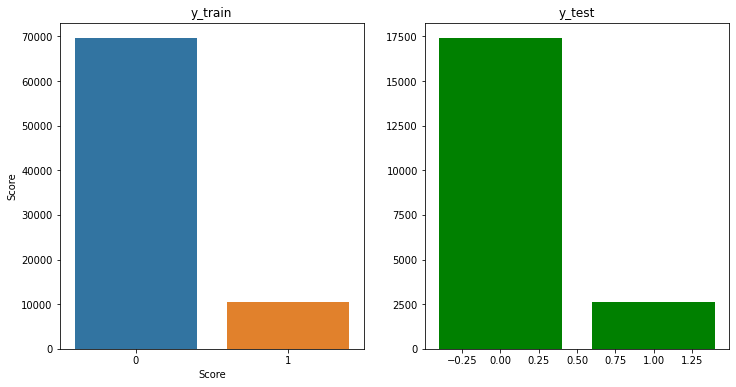

In [24]:
#plot bar graphs of y_train and y_test
import seaborn as sns

f, ax= plt.subplots(1, 2, figsize= (12, 6))

sns.barplot(x= y_train, y= y_train.value_counts(), orient= 'v', ax= ax[0])
ax[0].set_title('y_train')
ax[1].bar([0, 1], y_test.value_counts(), color= 'green')
ax[1].set_title('y_test')
ax[1].plot

plt.show()

In [0]:
#saving to disk. if we need, we can load preprocessed data directly. 
reviews.to_csv('preprocessed.csv', index=False)

<pre><font size=6>Part-2: Creating BERT Model</font> 

If you want to know more about BERT, You can watch live sessions on Transformers and BERt. we will strongly recommend you to read <a href="https://jalammar.github.io/illustrated-transformer/">Transformers</a>, <a href="https://arxiv.org/abs/1810.04805">BERT Paper</a> and, <a href="https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/">This blog</a>.


For this assignment, we are using <a href="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1">BERT uncased Base model</a>. It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. </pre>

In [0]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 55

# BERT takes 3 inputs

# this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

# mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

# segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
# If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
# second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

# bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

# Bert model
# We are using only pooled output not sequence out. 
# If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


In [27]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 55)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 55)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 55)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [28]:
bert_model.output

<tf.Tensor 'keras_layer/Identity:0' shape=(None, 768) dtype=float32>

<pre><font size=6>Part-3: Tokenization</font></pre>

In [0]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [30]:
! pip3 install sentencepiece

     |████████████████████████████████| 1.1MB 4.8MB/s 


In [31]:
import os

! ls

amazon-fine-food-reviews.zip  hashes.txt	Reviews.csv  test.csv
database.sqlite		      preprocessed.csv	sample_data  tokenization.py


In [0]:
#import tokenization - We have given tokenization.py file
# ! python /content/tokenization.py

import tokenization

In [0]:
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [0]:
# Create tokenizer " Instantiate FullTokenizer" 
# name must be "tokenizer"
# the FullTokenizer takes two parameters 1. vocab_file and 2. do_lower_case 
# we have created these in the above cell ex: FullTokenizer(vocab_file, do_lower_case )
# please check the "tokenization.py" file the complete implementation

#### Example
<img src='https://i.imgur.com/5AhhmgU.png'>

<font size=4>Grader function 3 </font>

In [35]:
#it has to give no error 
def grader_tokenize(tokenizer):
    out = False
    try:
        out=('[CLS]' in tokenizer.vocab) and ('[SEP]' in tokenizer.vocab)
    except:
        out = False
    assert(out==True)
    return out
grader_tokenize(tokenizer)

True

In [36]:
print('Minimum length of review:' ,reviews['len'].min())
print('Maximum length of review:' ,reviews['len'].max())

Minimum length of review: 4
Maximum length of review: 49


In [37]:
# Create train and test tokens (X_train_tokens, X_test_tokens) from (X_train, X_test) using Tokenizer and 

X_tr_tokens= [tokenizer.tokenize(i) for i in X_train.values]
X_ts_tokens= [tokenizer.tokenize(i) for i in X_test.values]

print('Maximum lenth of tokens in train:',max([len(i) for i in X_tr_tokens]))
print('Minimum lenth of tokens in train:',min([len(i) for i in X_ts_tokens]))


Maximum lenth of tokens in train: 90
Minimum lenth of tokens in train: 3


In [38]:
# maximum number of tokens is 55 (We already given this to BERT layer above) so shape is (None, 55)

a= [i[0:(max_seq_length - 2)] for i in X_tr_tokens]
b= [i[0:(max_seq_length - 2)] for i in X_ts_tokens]

print('Maximum lenth of tokens after max_seq_len:',max([len(i) for i in a]))
print('Minimum lenth of tokens after max_seq_len:',min([len(i) for i in b]))

# add '[CLS]' at start of the Tokens and '[SEP]' at the end of the tokens. 

def tokens(data):

  # can use 0 also
  data.insert(-len(data) , '[CLS]')
  
  # cannot use -1 https://stackoverflow.com/a/30212470/10219869                                    
  data.insert(len(data) , '[SEP]') 
    
  # insert PAD tokens after SEP tokens until end of max_seq_len
  if len(data) < (max_seq_length):
      data.extend(('[PAD] '*((max_seq_length) - len(data))).split())
                        
  return data

X_train_token= [tokens(i) for i in a]
X_test_token= [tokens(i) for i in b]
  
print('Sample output', X_train_token[0] )

Maximum lenth of tokens after max_seq_len: 53
Minimum lenth of tokens after max_seq_len: 3
Sample output ['[CLS]', 'i', 'had', 'never', 'tried', 'this', 'brand', 'before', 'so', 'was', 'worried', 'about', 'the', 'quality', 'it', 'tasted', 'great', 'very', 'nice', 'smooth', 'rich', 'full', 'flavor', 'its', 'my', 'new', 'favor', '##et', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [39]:
# positional encoding

X_train_pos_enc = [tokenizer.convert_tokens_to_ids(i) for i in X_train_token]
X_test_pos_enc = [tokenizer.convert_tokens_to_ids(i) for i in X_test_token]

print('Sample positional encodings:', X_train_pos_enc[0])

Sample positional encodings: [101, 1045, 2018, 2196, 2699, 2023, 4435, 2077, 2061, 2001, 5191, 2055, 1996, 3737, 2009, 12595, 2307, 2200, 3835, 5744, 4138, 2440, 14894, 2049, 2026, 2047, 5684, 3388, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [40]:
# crosschecking the length of each datapoint 
a= []
for i in X_train_pos_enc:
  a.append(len(i))

print(min(a))
print(max(a))

55
55


In [41]:
X_train_tokens = np.array(X_train_pos_enc)
X_test_tokens = np.array(X_test_pos_enc)

print(X_train_tokens.shape, ': Shape of X_train_tokens')
print(X_test_tokens.shape, ': Shape of X_test_tokens')

(80000, 55) : Shape of X_train_tokens
(20000, 55) : Shape of X_test_tokens


In [42]:
# if it is less than 55, add '[PAD]' token else truncate the tokens length.(similar to padding)
# Based on padding, create the mask for Train and Test ( 1 for real token, 0 for '[PAD]'), 
# it will also same shape as input tokens (None, 55) save those in X_train_mask, X_test_mask

def masking(data):
  
  mask=[]
  for j in data:
    if j == 0:
      mask.append(0)
    else:
      mask.append(1)
  return mask
  

X_train_mask = [masking(i) for i in X_train_tokens]
X_test_mask = [masking(i) for i in X_test_tokens]

print('Sample Masks:', X_train_mask[0])

Sample Masks: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [43]:
X_train_masks = np.array(X_train_mask)
X_test_masks = np.array(X_test_mask)

print(X_train_masks.shape, ': Shape of X_train_masks')
print(X_test_masks.shape, ': Shape of X_test_masks')


(80000, 55) : Shape of X_train_masks
(20000, 55) : Shape of X_test_masks


In [44]:
# Create a segment input for train and test. We are using only one sentence so all zeros. This shape will also (None, 55)

X_train_segment = [[0]*max_seq_length for i in X_train_tokens]
X_test_segment = [[0]*max_seq_length for i in X_test_tokens]

print('Sample positional encodings:', X_train_segment[0])


Sample positional encodings: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [45]:
X_train_segments = np.array(X_train_segment)
X_test_segments = np.array(X_test_segment)

print(X_train_segments.shape, ': Shape of X_train_segments')
print(X_test_segments.shape, ': Shape of X_test_segments')


(80000, 55) : Shape of X_train_segments
(20000, 55) : Shape of X_test_segments


In [0]:
import pickle

#save all your results to disk so that, no need to run all again. 
pickle.dump((X_train, X_train_tokens, X_train_mask, X_train_segment, y_train),open('train_data.pkl','wb'))
pickle.dump((X_test, X_test_tokens, X_test_mask, X_test_segment, y_test),open('test_data.pkl','wb'))

#you can load from disk
# X_train, X_train_tokens, X_train_mask, X_train_segment, y_train = pickle.load(open("train_data.pkl", 'rb')) 
#  X_test, X_test_tokens, X_test_mask, X_test_segment, y_test = pickle.load(open("test_data.pkl", 'rb')) 

<font size=4>Grader function 4 </font>

In [47]:
def grader_alltokens_train():
    out = False
    
    if type(X_train_tokens) == np.ndarray:
        
        temp_shapes = (X_train_tokens.shape[1]==max_seq_length) and (X_train_masks.shape[1]==max_seq_length) and \
        (X_train_segments.shape[1]==max_seq_length)
        print(temp_shapes)
        
        segment_temp = not np.any(X_train_segments)
        print(segment_temp)
        
        mask_temp = np.sum(X_train_masks==0) == np.sum(X_train_tokens==0)
        print(mask_temp)
        
        no_cls = np.sum(X_train_tokens==tokenizer.vocab['[CLS]'])==X_train_tokens.shape[0]
        print(no_cls)
        
        no_sep = np.sum(X_train_tokens==tokenizer.vocab['[SEP]'])==X_train_tokens.shape[0]
        print(no_sep)
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be list not numpy array')
        out = False
    assert(out==True)
    return out

grader_alltokens_train()

True
True
True
True
True


True

<font size=4>Grader function 5 </font>

In [48]:
def grader_alltokens_test():
    out = False
    if type(X_test_tokens) == np.ndarray:
        
        temp_shapes = (X_test_tokens.shape[1]==max_seq_length) and (X_test_masks.shape[1]==max_seq_length) and \
        (X_test_segments.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_test_segments)
        
        mask_temp = np.sum(X_test_masks==0) == np.sum(X_test_tokens==0)
        
        no_cls = np.sum(X_test_tokens==tokenizer.vocab['[CLS]'])==X_test_tokens.shape[0]
        
        no_sep = np.sum(X_test_tokens==tokenizer.vocab['[SEP]'])==X_test_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be list not numpy array')
        out = False
    assert(out==True)
    return out
grader_alltokens_test()

True

<pre><font size=6>Part-4: Getting Embeddings from BERT Model</font>
We already created the BERT model in the part-2 and input data in the part-3. We will utlize those two and will get the embeddings for each sentence in the Train and Validation data.</pre>

In [49]:
bert_model.input

[<tf.Tensor 'input_word_ids:0' shape=(None, 55) dtype=int32>,
 <tf.Tensor 'input_mask:0' shape=(None, 55) dtype=int32>,
 <tf.Tensor 'segment_ids:0' shape=(None, 55) dtype=int32>]

In [50]:
bert_model.output

<tf.Tensor 'keras_layer/Identity:0' shape=(None, 768) dtype=float32>

In [0]:
# get the train output, BERT model will give one output so save in
X_train_pooled_output = bert_model.predict(x=[X_train_tokens, X_train_masks, X_train_segments])

# get the test output, BERT model will give one output so save in
X_test_pooled_output = bert_model.predict(x= [X_test_tokens, X_test_masks, X_test_segments])

In [0]:
#save all your results to disk so that, no need to run all again. 
pickle.dump((X_train_pooled_output, X_test_pooled_output),open('final_output.pkl','wb'))

# X_train_pooled_output, X_test_pooled_output= pickle.load(open('final_output.pkl', 'rb'))

<font size=4>Grader function 6 </font>

In [53]:
#now we have X_train_pooled_output, y_train
#X_test_pooled_ouput, y_test

#please use this grader to evaluate
def grader_output():
    assert(X_train_pooled_output.shape[1]==768)
    assert(len(y_train)==len(X_train_pooled_output))
    assert(X_test_pooled_output.shape[1]==768)
    assert(len(y_test)==len(X_test_pooled_output))
    assert(len(y_train.shape)==1)
    assert(len(X_train_pooled_output.shape)==2)
    assert(len(y_test.shape)==1)
    assert(len(X_test_pooled_output.shape)==2)
    return True
grader_output()

True

<pre><font size=6>Part-5: Training a NN with 768 features</font>

Create a NN and train the NN. 
1. You have to use AUC as metric. 
2. You can use any architecture you want. 
3. You have to use tensorboard to log all your metrics and Losses. You have to send those logs. 
4. Print the loss and metric at every epoch. 
5. You have to submit without overfitting and underfitting. 
</pre>

In [54]:
X_train_pooled_output.shape

(80000, 768)

In [0]:
# imports
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [0]:
import sklearn.metrics as skm

def auc1(y_true, y_pred):
  if len(np.unique(y_true[:,1])) == 1:
    return 0.5
  else:
    return skm.roc_auc_score(y_true, y_pred)

def aucroc(y_true, y_pred):
  return tf.py_function(auc1, (y_true, y_pred), tf.double)

In [57]:
# create an NN and 
Input_bert = tf.keras.Input(shape= (768,), name = 'bert')
bert_nn= Dense(units= 2, activation= 'sigmoid')(Input_bert)

model = Model(inputs = Input_bert, outputs = bert_nn)
model.compile(loss= 'binary_crossentropy', optimizer= 'adam',metrics= ['accuracy', aucroc])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (InputLayer)            [(None, 768)]             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1538      
Total params: 1,538
Trainable params: 1,538
Non-trainable params: 0
_________________________________________________________________


In [58]:
print('Y Train Before OHE: ',y_train[0])
print()
# We do OHE --> to vector, 2 dimentional
Y_train = tf.keras.utils.to_categorical(y = y_train, num_classes = 2)
Y_test = tf.keras.utils.to_categorical(y = y_test, num_classes = 2)
# A sample data point after OHE
print('Y Train After OHE: ', Y_train[0])


Y Train Before OHE:  1

Y Train After OHE:  [0. 1.]


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint(filepath= '/content/bert.h5', monitor= 'val_loss', verbose= 1, save_best_only= True,
                            save_weights_only= True )]

In [61]:
# the other 10k datapoints are used for predict 
history = model.fit(x = X_train_pooled_output, y= Y_train, validation_data= (X_test_pooled_output[:10000], Y_test[:10000]), 
                    batch_size= 128, epochs= 30, callbacks= callbacks)

Epoch 1/30
614/625 [============================>.] - ETA: 0s - loss: 0.3251 - accuracy: 0.8723 - aucroc: 0.8120
Epoch 00001: val_loss improved from inf to 0.29563, saving model to /content/bert.h5
625/625 [==============================] - 3s 5ms/step - loss: 0.3242 - accuracy: 0.8725 - aucroc: 0.8133 - val_loss: 0.2956 - val_accuracy: 0.8731 - val_aucroc: 0.8634
Epoch 2/30
622/625 [============================>.] - ETA: 0s - loss: 0.2732 - accuracy: 0.8835 - aucroc: 0.8893
Epoch 00002: val_loss improved from 0.29563 to 0.26621, saving model to /content/bert.h5
625/625 [==============================] - 3s 5ms/step - loss: 0.2733 - accuracy: 0.8834 - aucroc: 0.8894 - val_loss: 0.2662 - val_accuracy: 0.8850 - val_aucroc: 0.8933
Epoch 3/30
620/625 [============================>.] - ETA: 0s - loss: 0.2517 - accuracy: 0.8925 - aucroc: 0.9077
Epoch 00003: val_loss improved from 0.26621 to 0.25083, saving model to /content/bert.h5
625/625 [==============================] - 3s 5ms/step - los

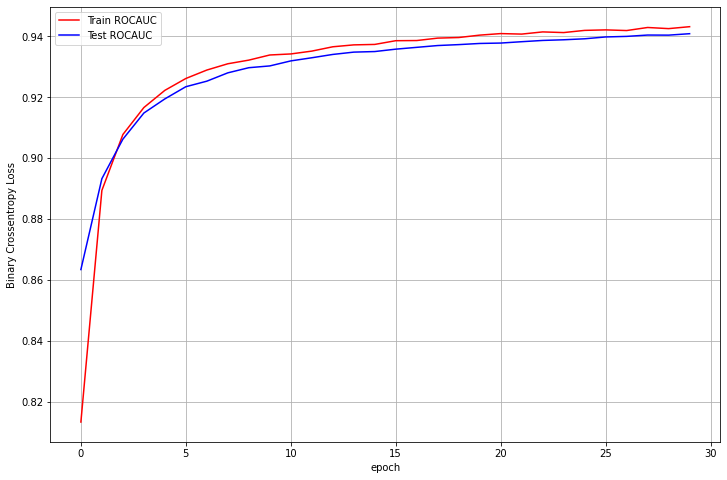

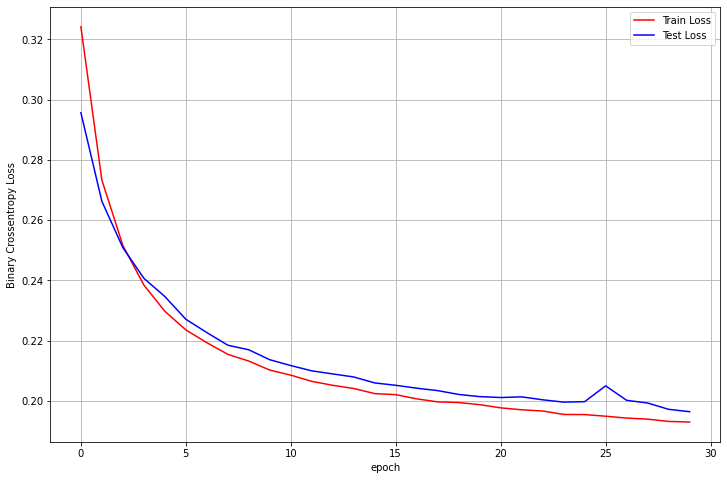

In [62]:
plt.figure(figsize = (12, 8))
plt.plot(history.history['aucroc'], 'r')
plt.plot(history.history['val_aucroc'], 'b')
plt.xlabel('epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend({'Train ROCAUC': 'r', 'Test ROCAUC':'b'})
plt.grid()
plt.show()

plt.figure(figsize = (12, 8))
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.xlabel('epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.grid()
plt.show()

<Pre><font size=6>Part-6: Creating a Data pipeline for BERT Model</font> 

1. Download data from <a href="https://drive.google.com/file/d/1QwjqTsqTX2vdy7fTmeXjxP3dq8IAVLpo/view?usp=sharing">here</a>
2. Read the csv file
3. Remove all the html tags
4. Now do tokenization [Part 3 as mentioned above]
    * Create tokens,mask array and segment array
5. Get Embeddings from BERT Model [Part 4 as mentioned above] , let it be X_test
   * Print the shape of output(X_test.shape).You should get (352,768)
6. Predit the output of X_test with the Neural network model which we trained earlier.
7. Print the occurences of class labels in the predicted output

</pre>

In [74]:
a = pd.read_csv('/content/test.csv')
print(a.head(3))
print(a.shape)

                                                Text
0  Just opened Greenies Joint Care (individually ...
1  This product rocks :) My mom was very happy w/...
2  The product was fine, but the cost of shipping...
(352, 1)


In [0]:
from collections import Counter

def pipeline(data):
  b = pd.read_csv(data)
  b = [clean_sentence(i) for i in b['Text']]
  b = [tokenizer.tokenize(i) for i in b]
  b= [i[0:(max_seq_length - 2)] for i in b]
  tkn = [tokens(i) for i in b]
  token = np.array([tokenizer.convert_tokens_to_ids(i) for i in tkn])
  print('Tokens:', token.shape)
  mask = np.array([masking(i) for i in tkn])
  print('Masks:', mask.shape)
  segment = np.array([[0]*max_seq_length for i in tkn])
  print('Segments:', segment.shape)
  pooled = bert_model.predict([token, mask,segment])
  print('Pooled:', pooled.shape)
  model.load_weights('/content/bert.h5')
  pred = model.predict(pooled)
  y = pred.argmax(axis= -1)
  print('Y:',y)
  print(Counter(y))

In [78]:
pipeline(data= '/content/test.csv')

Tokens: (352, 55)
Masks: (352, 55)
Segments: (352, 55)
Pooled: (352, 768)
Y: [0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0
 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1
 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0]
Counter({0: 213, 1: 139})
